In [120]:
import os
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import warnings
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from random import shuffle
from tqdm import tqdm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
#from sklearn.linear_model import SGDClassifier
from skimage import io, feature, color

warnings.filterwarnings('ignore')
print(os.listdir(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset"))




['pavement_predict.csv', 'predictions8.csv', 'ReadMe.txt', 'sample_submission.csv', 'test', 'train']


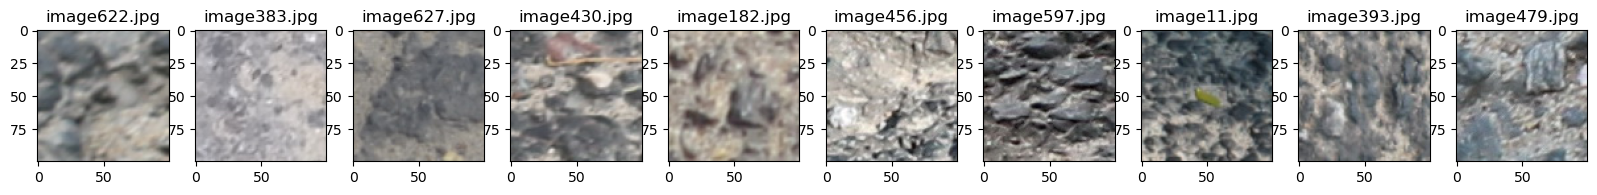

In [121]:
# ------------------------------Load and preprocess the training data-----------------------------------------------------#
train_raveling = os.listdir(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Raveling")
train_non_raveling = os.listdir(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Non_raveling")
image_size = 256

#--------------------------image displaying through matplotlib library----------------------------------------------------#

plt.figure(figsize=(20,20))
test_folder=r'F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\test'
for i in range(10):
    file = random.choice(os.listdir(r'F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Raveling'))
    image_path= os.path.join(r'F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Raveling', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,10,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [128]:
#-----------------------------------Defining features for the training data-----------------------------------------------#
train_images = []
train_labels = []
for img in train_raveling:
    image = cv2.imread(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Raveling/" + img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = feature.canny(image)
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    norm = np.max(image, axis=(0, 1)) - np.mean(image, axis=(0, 1))
    norm2 = np.max(image, axis=(0, 1)) - np.min(image, axis=(0, 1))
    features = np.concatenate((edges.ravel(),[mean, std, norm, norm2]))
    train_images.append(features)
    train_labels.append(0)

for img in train_non_raveling:
    image = cv2.imread(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\train\Non_raveling/" + img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = feature.canny(image)
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    norm = np.max(image, axis=(0, 1)) - np.mean(image, axis=(0, 1))
    norm2 = np.max(image, axis=(0, 1)) - np.min(image, axis=(0, 1))
    features = np.concatenate((edges.ravel(),[mean, std, norm, norm2]))
    train_images.append(features)
    train_labels.append(1)

train_images = np.array(train_images)
train_labels = np.array(train_labels)



In [129]:
from sklearn.utils import shuffle
# Shuffle the full train data array
train_data_shuffled = shuffle(np.hstack((train_images, train_labels.reshape(-1, 1))), random_state=42)
train_features = train_data_shuffled[:, :-1]
train_labels = train_data_shuffled[:, -1]



In [130]:
test_images=[]
filenames=[]
for i in range(1, 301):
    image = cv2.imread(r"F:\Ranjan k\Data science python\raveling-detection-ce784a-2023\mod_ravelling_dataset\test/" + str(i) + '.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grad_x, grad_y = np.gradient(image)
    edges = np.sqrt(grad_x**2 + grad_y**2)
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    norm= np.max(image, axis=(0,1))-np.mean(image,axis=(0,1))
    norm2= np.max(image, axis=(0,1))-np.min(image,axis=(0,1))
    features = np.concatenate((edges.ravel(),[mean, std, norm, norm2]))
    test_images.append(features)
    filenames.append(str(i) + '.jpg')

test_images = np.array(test_images)
model.fit(train_images, train_labels)
test_labels = model.predict(test_images)

test_labels2=[]
for label in test_labels:
    if label == 1:
        test_labels2.append("Non_raveling")
    elif label == 0:
        test_labels2.append("Raveling")

print(test_labels2)


['Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Raveling', 'Raveling', 'Non_raveling', 'Raveling', 'Non_raveling', 'Raveling',

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define the model and fit the training data
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing data and calculate the metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Printing the values
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)


Precision: 0.7014925373134329
Recall: 0.7580645161290323
F1-score: 0.7286821705426356
Accuracy: 0.75


[[58 20]
 [15 47]]


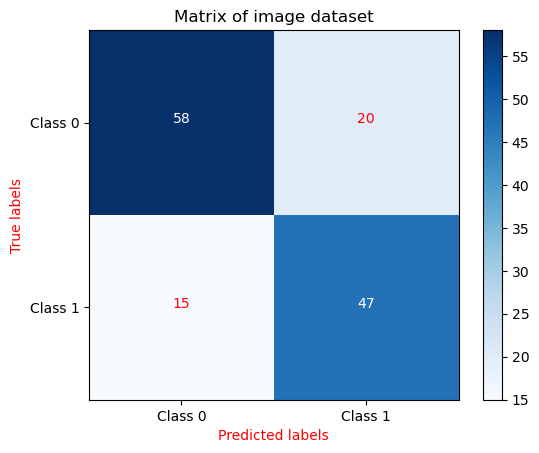

In [132]:
#Plotting the Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

# Add labels to the plot
plt.xlabel("Predicted labels", color='RED')
plt.ylabel("True labels", color='red')

# Add title to the plot
plt.title("Matrix of image dataset")

# Add the color bar
plt.colorbar()

# Add the labels to the color bar
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add the text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "RED")

# Show the plot
plt.show()

In [133]:

df = pd.DataFrame({'filename': filenames, 'class': test_labels2})
df2=df.set_index("filename")
df2.to_csv('pavement_predict.csv')